# 통신사 고객의 가입 해지 여부 예측 모델

## 데이터
- gender(성별)<br>
    Whether the customer is a male or a female


- SeniorCitizen(고령자 여부)<br>
    Whether the customer is a senior citizen or not (1, 0)


- Partner(배우자 유무)<br>
    Whether the customer has a partner or not (Yes, No)


- Dependents(부양가족 유무)<br>
    Whether the customer has dependents or not (Yes, No)


- tenure(근속월수)<br>
    Number of <strong>months</strong> the customer has stayed with the company


- PhoneService(휴대폰 유무)<br>
    Whether the customer has a phone service or not (Yes, No)


- MultipleLines(휴대폰 2개 이상 여부)<br>
    Whether the customer has multiple lines or not (Yes, No, No phone service)


- InternetService(인터넷 이용 여부 + 종류)<br>
    Customer’s internet service provider (DSL, Fiber optic, No)


- OnlineSecurity(보안 설정 여부)<br>
    Whether the customer has online security or not (Yes, No, No internet service)
    
    
- OnlineBackup(온라인 백업 여부)<br>
    Whether the customer has online backup or not (Yes, No, No internet service)

 
- DeviceProtection(단말기 보안 설정 여부)<br>
    Whether the customer has device protection or not (Yes, No, No internet service)


- TechSupport(기술 지원 여부)<br>
    Whether the customer has tech support or not (Yes, No, No internet service)


- StreamingTV(TV 시청 여부) <br>
    Whether the customer has streaming TV or not (Yes, No, No internet service)


- StreamingMovies(영화 시청 여부) <br>
    Whether the customer has streaming movies or not (Yes, No, No internet service)


- Contract(약정 기간) <br>
    The contract term of the customer (Month-to-month, One year, Two year)


- PaperlessBilling(디지털 청구서 수신 여부) <br>
    Whether the customer has paperless billing or not (Yes, No)


- PaymentMethod(결제 방식)<br>
    The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


- MonthlyCharges(월 지불 금액)  <br>
    The amount charged to the customer monthly


- TotalCharges(지불할 총 금액) <br>
    The total amount charged to the customer


- Churn (가입 해지 여부)<br>
    Whether the customer churned or not (Yes or No)

In [83]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 13.0

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [85]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        main_df = pd.read_csv(os.path.join(dirname, filename))

In [86]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
main_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [88]:
main_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


------------------------------
object 타입이 많다. <br>
타입 변환이 필요해보인다.<br><br>



In [89]:
main_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

----------------
nunique값을 보니 Yes, No 형식이 제대로 맞춰져있나보다. (ex) YeS,YES,no,no phone service 이런식으로 되어 있는게 없다)

In [90]:
main_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

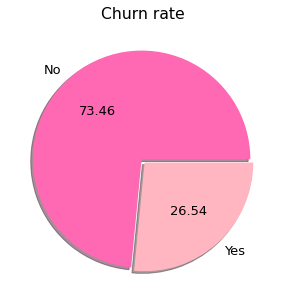

In [91]:
plt.figure(figsize=(5,5))
plt.title("Churn rate")
explodes=[0.02,0.02]
plt.pie(main_df.Churn.value_counts(),shadow=True,explode=explodes, labels= main_df.Churn.value_counts().keys(), autopct = "%.2f", colors= ['hotpink', 'lightpink'])
plt.show()

-------
데이터 불균형이 확인되었다. EDA 후 리샘플링을 수행해야겠다.

<br><br><br>
# 전처리
- 타입 변환
- 결측값 처리
- 이상값 제거

## 총지불금액(TotalCharges) -> float

In [92]:
main_df['TotalCharges'] = main_df['TotalCharges'].replace(' ','0').astype(float) 


In [93]:
main_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [94]:
main_df.loc[main_df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


-----------------
TotalCharges가 누락된 고객명단 -> contract를 참고해서 예측값을 넣자

## Contract -> int

In [95]:
dic = {'Month-to-month':1, 'One year':12, 'Two year': 24} 
for c in main_df.Contract.unique():
    main_df.Contract.replace(c,dic[c], inplace = True)

## TotalCharges 누락값 계산 : MonthlyCharges * Contract

In [96]:
#TotalCharges가 0인 고객 예측값    
main_df['TotalCharges'].replace(0.0,main_df['MonthlyCharges']*main_df['Contract'], inplace = True)

In [97]:
main_df.loc[main_df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


-------------------
이제 모든 고객의 TotalCharges가 채워졌다.

In [98]:
main_df.TotalCharges.describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

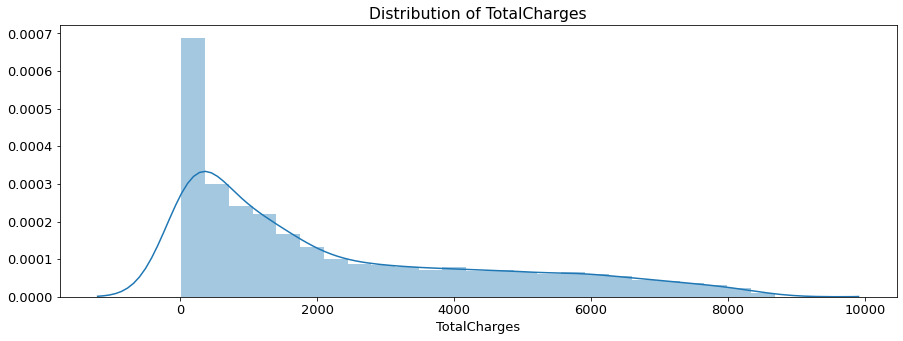

In [99]:
plt.figure(figsize=(15,5))
sns.distplot(main_df.TotalCharges)
plt.xlabel("TotalCharges")
plt.title("Distribution of TotalCharges")
plt.show()

In [100]:
main_df.TotalCharges.nunique()

6541

-----------
그런데 값의 분포가 너무 넓어서 binning을 수행해야할 것 같다.

In [101]:
tmp_min = main_df.TotalCharges.min() #최솟값
tmp_max = main_df.TotalCharges.max() #최댓값
tmp_mean = main_df.TotalCharges.mean() #평균
bins = [tmp_min-1,tmp_mean/7,tmp_mean/2,tmp_mean,tmp_max/2,tmp_max] #최소~평균/7,평균/7~평균/2,평균/2 ~평균,평균~최대/2,최대/2~최대 
bins

[17.8,
 325.89332265065667,
 1140.6266292772984,
 2281.253258554597,
 4342.4,
 8684.8]

In [102]:
main_df['TotalCharges_bin'] = pd.cut(main_df.TotalCharges, bins, labels = list(range(len(bins)-1)))
main_df['TotalCharges_bin'].head()

0    0
1    2
2    0
3    2
4    0
Name: TotalCharges_bin, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [103]:
main_df.TotalCharges_bin.value_counts()

0    1579
1    1548
4    1467
2    1267
3    1182
Name: TotalCharges_bin, dtype: int64

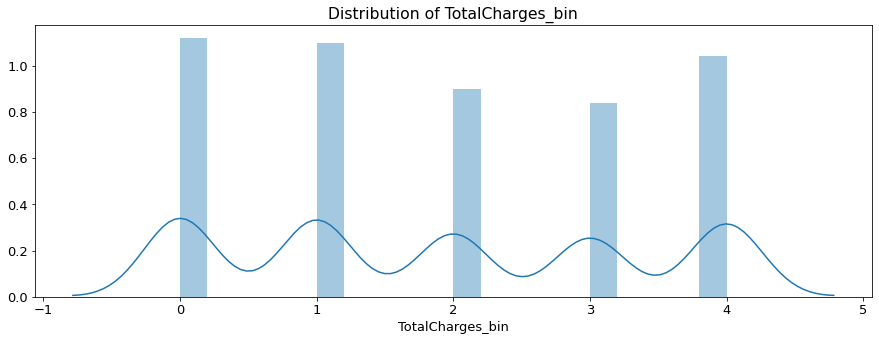

In [104]:
plt.figure(figsize=(15,5))
sns.distplot(main_df.TotalCharges_bin)
plt.xlabel("TotalCharges_bin")
plt.title("Distribution of TotalCharges_bin")
plt.show()

------------------
5개의 그룹을 생성하여 분포의 범위를 줄였고, 그룹당 구성원 수도 비슷하게 맞추었다. 

## Remove Outlier

In [105]:
main_df.describe()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,8.835865,64.761692,2281.253259
std,0.368612,24.559481,9.551444,30.090047,2265.703526
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,1.000000,35.500000,401.900000
50%,0.000000,29.000000,1.000000,70.350000,1396.250000
75%,0.000000,55.000000,12.000000,89.850000,3786.600000
max,1.000000,72.000000,24.000000,118.750000,8684.800000


- TotalCharges가 상위 25퍼 이내인 고객들의 MonthlyCharges 분포

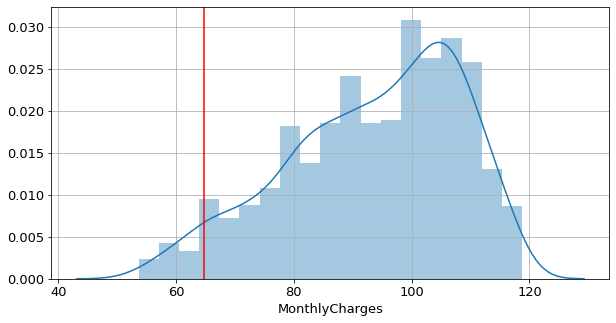

In [106]:
plt.figure(figsize=(10,5))
sns.distplot(main_df[main_df.TotalCharges > main_df.TotalCharges.quantile(0.75)].MonthlyCharges)
plt.axvline(x= main_df.MonthlyCharges.mean(),color='r')
plt.grid()
plt.show()

----
빨간 수직선은 MonthlyCharges의 평균

- TotalCharges는 상위 25퍼 이내이면서 MonthlyCharges는 평균에 못미치는 데이터 삭제

In [107]:
main_df.drop(main_df[main_df.TotalCharges > main_df.TotalCharges.quantile(0.75)].loc[main_df.MonthlyCharges<main_df.MonthlyCharges.mean()].index, inplace=True)

In [108]:
main_df.shape

(6969, 22)

## Label Encoding

In [109]:
from sklearn.preprocessing import LabelEncoder
label_df = pd.DataFrame()
label_df['Churn']= main_df['Churn'].replace({'Yes':1, 'No':0})
Encoder = LabelEncoder()
for c in main_df.columns:
    label_df[c]= Encoder.fit_transform(main_df[c])

In [110]:
label_df.shape

(6969, 22)

## One-hot Encoding

In [111]:
one_hot_df = pd.get_dummies(main_df.drop('Churn', axis=1).iloc[:,1:])
one_hot_df['Churn']= main_df['Churn'].replace({'Yes':1, 'No':0})

In [112]:
one_hot_df.shape

(6969, 49)

--------------------------------
customerID를 제외한 모든 object타입을 적절한 타입으로 변환시켰다.

<br><br><br>
# EDA
- 각 속성과 Churn의 상관관계 분석
- 속성 간의 상관관계 분석
- 분석을 토대로 구체적인 가설을 세우고 검증하기


**필요에 따라 파생속성 생성*

In [113]:
#시각화를 위한 color 딕셔너리
color_dic = {0:['#005b6e','#04668c'],1:['#3c6ca7','#786eb7'],2:['#a86bba','#da66ac'],
             3:['#ff6792','#aa6792'],4:['#d8e0bb','#b6cec7'],5:['#ff5050','#ffaa00'],
            6:['#ff99ff','#ff6699',],7:['#e6f2ff','#99ccff'],8:['#ccccff','#cc99ff'],
            9:['#ff9966', '#ff6600']}

## 디지털 친화도(familiar_with_digital)와 Churn의 상관관계
    - 디지털 친화도 측정 방법: 백업, 보안, 다양한 서비스 이용여부 등 정보를 활용

In [114]:
main_df.iloc[:,6:15]

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No phone service,DSL,No,Yes,No,No,No,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No,No phone service,DSL,Yes,No,No,No,No,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No


------------------
위 9개 서비스 이용을 많이할수록 디지털 친화도가 높다고 판단한다.

In [115]:
'''
DSL,Fiber optic, No Phone service 등 다양한 응답이 있으므로 
공백을 기준으로 split을 수행하고 첫번째 요소가 'No'만 아니면 친화도를 높인다(return 1)
'''

def count_digital(x):
    return  1 if x.split()[0]!='No' else 0

count_dig = [0 for _ in range(len(main_df))]
for e in range(6,15):
    for ind in range(len(main_df)):
        count_dig[ind] += count_digital(main_df.iloc[ind,e])
        
#디지털 친화도 컬럼 추가
main_df['familiar_with_digital'] = count_dig
main_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_bin,familiar_with_digital
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,1,Yes,Electronic check,29.85,29.85,No,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,12,No,Mailed check,56.95,1889.50,No,2,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,1,Yes,Mailed check,53.85,108.15,Yes,0,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,12,No,Bank transfer (automatic),42.30,1840.75,No,2,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,1,Yes,Electronic check,70.70,151.65,Yes,0,2


In [116]:
main_df.familiar_with_digital.describe()

count    6969.000000
mean        4.130578
std         2.318410
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: familiar_with_digital, dtype: float64

In [117]:
pd.pivot_table(main_df, index=['familiar_with_digital', 'Churn'])

Contract  MonthlyCharges  SeniorCitizen  \
familiar_with_digital Churn                                             
1                     No     12.153641       20.155906       0.025755   
                      Yes     1.971014       21.185870       0.123188   
2                     No     11.559865       36.192917       0.114671   
                      Yes     1.383459       54.948684       0.210526   
3                     No      3.351931       57.290343       0.145923   
                      Yes     1.231579       67.107763       0.247368   
4                     No      6.112211       65.186881       0.161716   
                      Yes     1.633523       76.776278       0.255682   
5                     No      7.744681       75.609820       0.162029   
                      Yes     2.274306       86.866667       0.309028   
6                     No     11.001560       84.596568       0.176287   
                      Yes     3.258621       94.932112       0.318966   
7                     No     14.963107       91.656311       0.180583   
                      Yes     6.210526      102.129276       0.269737   
8                     No     17.930636       98.490462       0.170520   
                      Yes    12.040816      106.041837       0.265306   
9                     No     22.309645      104.135025       0.147208   
                      Yes    13.363636      113.536364       0.181818   

                             TotalCharges     tenure  
familiar_with_digital Churn                           
1                     No       544.216075  27.081705  
                      Yes      122.361957   5.934783  
2                     No       959.169646  32.539629  
                      Yes      325.139662   6.556391  
3                     No      1111.154077  20.324034  
                      Yes      582.636579   9.021053  
4                     No      1842.902640  29.082508  
                      Yes     1184.418182  15.715909  
5                     No      2690.009574  35.983633  
                      Yes     1776.750174  20.868056  
6                     No      3827.950780  44.773791  
                      Yes     2678.174353  28.172414  
7                     No      4942.446019  53.638835  
                      Yes     4210.343421  41.118421  
8                     No      5992.733092  60.921965  
                      Yes     5456.477551  51.551020  
9                     No      6949.129949  66.558376  
                      Yes     6992.650000  62.363636

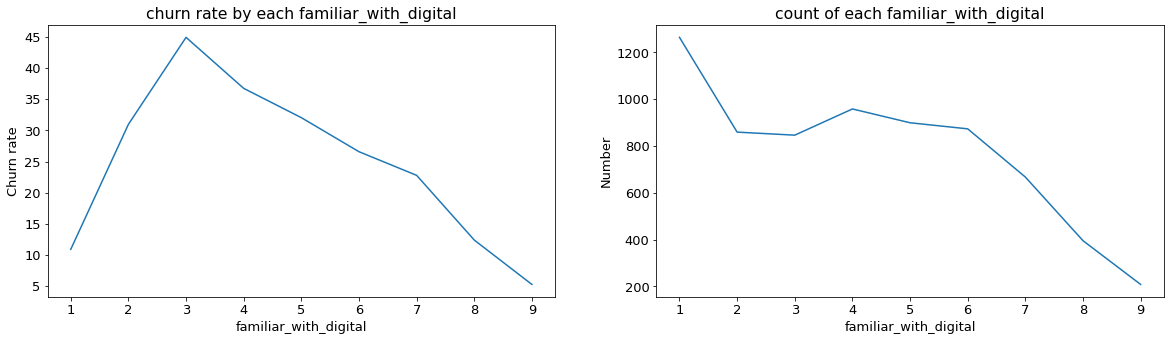

In [118]:
tmp_df = pd.DataFrame({'familiar_with_digital':[],'Churn rate':[],'Number':[]})
for i in range(1,10):
    target = main_df.loc[main_df.familiar_with_digital == i].Churn.value_counts()
    tmp_df = tmp_df.append({'familiar_with_digital':i,'Churn rate':round(target['Yes']/target.sum()*100,2),'Number':target.sum()},ignore_index=True)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("churn rate by each familiar_with_digital")
sns.lineplot(x=tmp_df['familiar_with_digital'], y= tmp_df['Churn rate'])
plt.subplot(1,2,2)
plt.title("count of each familiar_with_digital")
sns.lineplot(x=tmp_df['familiar_with_digital'], y= tmp_df['Number'])
plt.show()

In [119]:
tmp_df

,familiar_with_digital,Churn rate,Number
0,1.0,10.92,1264.0
1,2.0,30.97,859.0
2,3.0,44.92,846.0
3,4.0,36.74,958.0
4,5.0,32.04,899.0
5,6.0,26.58,873.0
6,7.0,22.79,667.0
7,8.0,12.41,395.0
8,9.0,5.29,208.0


------------------
디지털 친화도가 3일때까지는 친화도가 높아질수록 해지할 확률도 높아지는 양의 관계를 보이다가, 4부터는 음의 관계를 보이고 있다.

## familiar_with_digital2

In [120]:
main_df.iloc[:,6:15].replace({'No':0,'Yes':1}).replace({})

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,No phone service,DSL,0,1,0,0,0,0
1,1,0,DSL,1,0,1,0,0,0
2,1,0,DSL,1,1,0,0,0,0
3,0,No phone service,DSL,1,0,1,1,0,0
4,1,0,Fiber optic,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7038,1,1,DSL,1,0,1,1,1,1
7039,1,1,Fiber optic,0,1,1,0,1,1
7040,0,No phone service,DSL,1,0,0,0,0,0
7041,1,1,Fiber optic,0,0,0,0,0,0


In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
label = LabelEncoder()

In [122]:
label_ = pd.DataFrame()
for col in main_df.columns[6:15]:
    label_[col] = label.fit_transform(main_df.loc[:,col])

In [123]:
main_df['familiar_with_digital_pca'] = pca.fit_transform(label_)


In [124]:
main_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_bin,familiar_with_digital,familiar_with_digital_pca
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,1,Yes,Electronic check,29.85,29.85,No,0,2,-1.444164
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,12,No,Mailed check,56.95,1889.50,No,2,4,-1.035961
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,1,Yes,Mailed check,53.85,108.15,Yes,0,4,-1.256770
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,12,No,Bank transfer (automatic),42.30,1840.75,No,2,4,-0.083714
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,1,Yes,Electronic check,70.70,151.65,Yes,0,2,-2.341598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,12,Yes,Mailed check,84.80,1990.50,No,2,8,2.094957
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,12,Yes,Credit card (automatic),103.20,7362.90,No,4,7,1.674286
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,1,Yes,Electronic check,29.60,346.45,No,1,2,-1.630979
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,1,Yes,Mailed check,74.40,306.60,Yes,0,3,-1.730626


In [125]:
#모든 수치형 데이터간의 비교를 위해 정규화
from sklearn.preprocessing import MinMaxScaler
import copy
norm_df=copy.deepcopy(main_df)
scaler = MinMaxScaler()
norm_df[['Contract', 'MonthlyCharges','TotalCharges','familiar_with_digital','tenure','familiar_with_digital_pca']]=scaler.fit_transform(main_df[['Contract', 'MonthlyCharges','TotalCharges','familiar_with_digital','tenure','familiar_with_digital_pca']])

## TotalCharges와 Churn의 상관관계

No     3001
Yes    1393
Name: Churn, dtype: int64
No     2100
Yes     475
Name: Churn, dtype: int64
No     871
Yes    708
Name: Churn, dtype: int64
No     1240
Yes     213
Name: Churn, dtype: int64


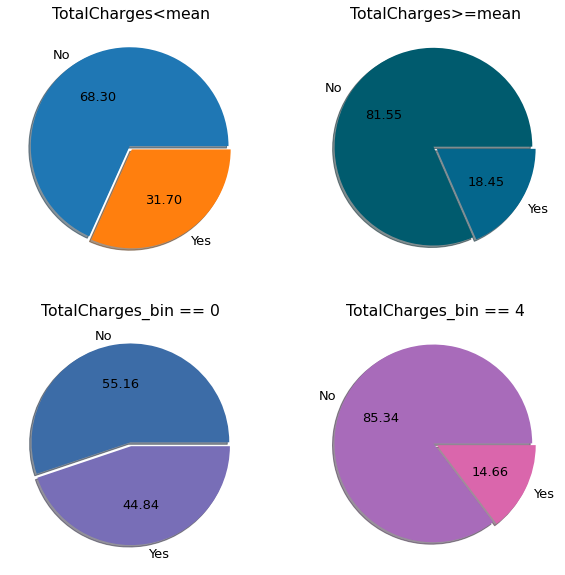

In [126]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("TotalCharges<mean")
print(main_df.loc[main_df.TotalCharges<tmp_mean].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges<tmp_mean].Churn.value_counts(),autopct ='%.2f',explode=explodes,shadow=True, labels=['No','Yes'])
plt.subplot(2,2,2)
plt.title("TotalCharges>=mean")
print(main_df.loc[main_df.TotalCharges>=tmp_mean].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges>tmp_mean].Churn.value_counts(),autopct ='%.2f',explode=explodes,shadow=True, labels=['No','Yes'], colors=color_dic[0])
plt.subplot(2,2,3)
plt.title("TotalCharges_bin == 0")
print(main_df.loc[main_df.TotalCharges_bin==0].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges_bin==0].Churn.value_counts(),autopct ='%.2f',explode=explodes,shadow=True, labels=['No','Yes'], colors=color_dic[1])
plt.subplot(2,2,4)
plt.title("TotalCharges_bin == 4")
print(main_df.loc[main_df.TotalCharges_bin==4].Churn.value_counts())
plt.pie(main_df.loc[main_df.TotalCharges_bin==4].Churn.value_counts(),autopct ='%.2f', explode=explodes,shadow=True,labels=['No','Yes'], colors=color_dic[2])
plt.show()

--------------------
위 결과를 보았을 때 TotalCharges이 높은 고객은 확실히 해지율이 낮다.<br><br>
그리고 그 차이는 양 끝단(TotalCharges가 아주 낮거나 아주 높을 때)에서 더 확연하다.

## Tenure과 Churn의 상관관계

No     2265
Yes    1441
Name: Churn, dtype: int64
No     2836
Yes     427
Name: Churn, dtype: int64


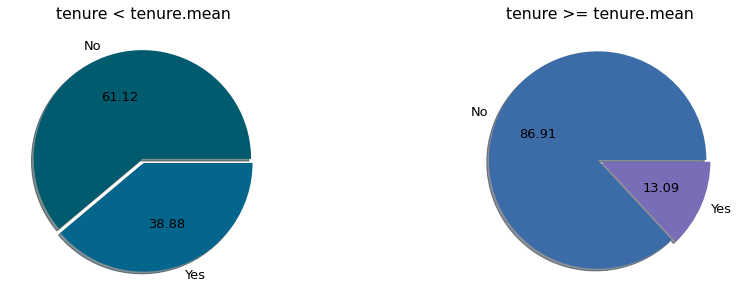

In [127]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("tenure < tenure.mean")
print(main_df.loc[main_df.tenure<main_df.tenure.mean()].Churn.value_counts())
plt.pie(main_df.loc[main_df.tenure<main_df.tenure.mean()].Churn.value_counts(),explode=explodes,shadow=True, labels=['No','Yes'],autopct="%.2f",colors=color_dic[0])
plt.subplot(1,2,2)
plt.title("tenure >= tenure.mean")
print(main_df.loc[main_df.tenure>=main_df.tenure.mean()].Churn.value_counts())
plt.pie(main_df.loc[main_df.tenure>=main_df.tenure.mean()].Churn.value_counts(),explode=explodes,shadow=True ,labels=['No','Yes'],autopct="%.2f",colors = color_dic[1])

plt.show()

---------------------------
평균을 기준으로 근속월수가 높은 사람이 낮은 사람보다 해지 않을 확률이 훨씬 높다.

## Contract과 Churn의 상관관계

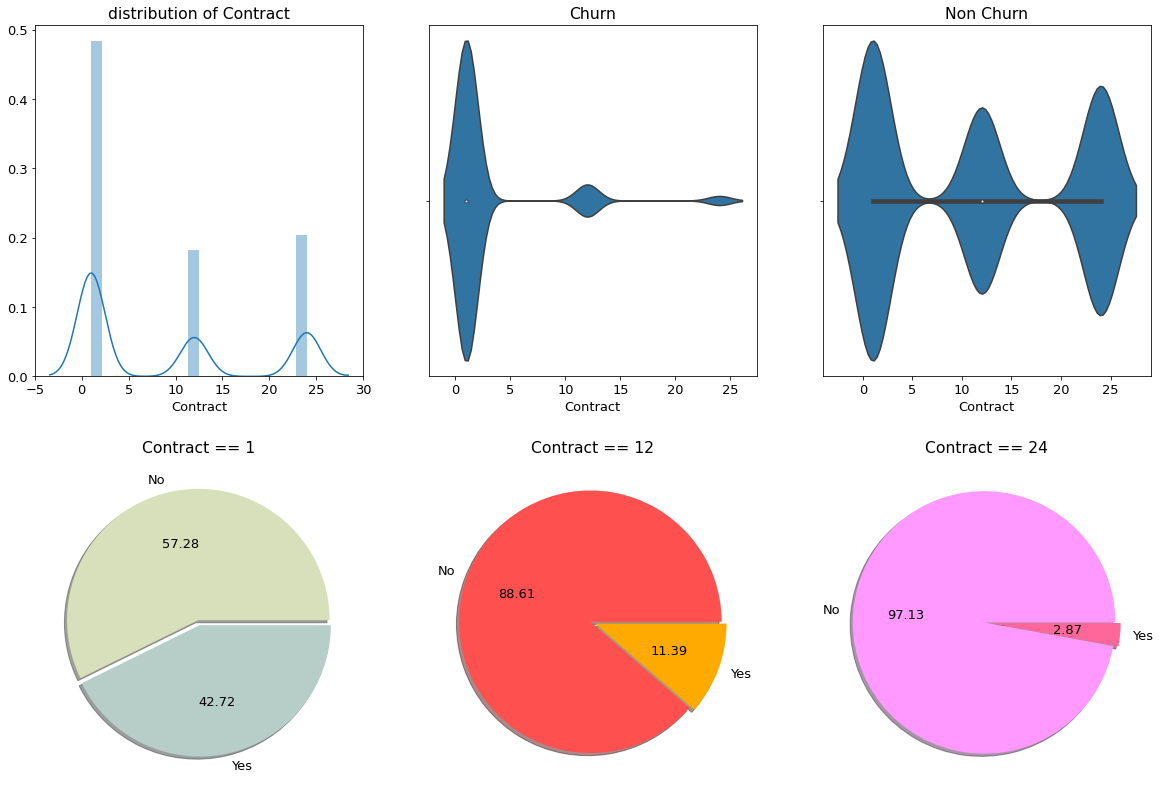

In [128]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(top=1.2)
plt.subplot(2,3,1)
plt.title("distribution of Contract")
sns.distplot(main_df.Contract)

plt.subplot(2,3,2)
plt.title("Churn")
sns.violinplot(main_df.loc[main_df.Churn=='Yes'].Contract)


plt.subplot(2,3,3)
plt.title("Non Churn")
sns.violinplot(main_df.loc[main_df.Churn=='No'].Contract)

for e,month in enumerate([1,12,24],4):
    plt.subplot(2,3,e)
    plt.title(f"Contract == {month}")
    plt.pie(main_df.loc[main_df.Contract==month].Churn.value_counts(), explode=explodes,shadow=True,autopct="%.2f", labels = main_df.loc[main_df.Contract==month].Churn.value_counts().keys(), colors= color_dic[e])

plt.show()

In [129]:
pd.pivot_table(main_df,index=['Contract'] )

,MonthlyCharges,SeniorCitizen,TotalCharges,familiar_with_digital,familiar_with_digital_pca,tenure
Contract,,,,,,
1,66.399148,0.208312,1368.507202,3.701600,-0.555394,18.024264
12,65.104701,0.126973,3022.014962,4.568291,0.423385,41.768703
24,60.785470,0.085470,3696.962576,4.755800,0.936949,56.308913


In [130]:
pd.pivot_table(main_df, index=['Churn'])

,Contract,MonthlyCharges,SeniorCitizen,TotalCharges,familiar_with_digital,familiar_with_digital_pca,tenure
Churn,,,,,,,
No,10.957655,61.277749,0.128602,2529.172309,4.152323,0.172742,37.127230
Yes,2.556210,74.452168,0.254818,1530.508271,4.071199,-0.471712,17.950214


--------------
위 결과에 따라 Contract가 높을수록 해지율이 낮아지는 것을 확인할 수 있다.

- Contract가 긴 사람들은 돈을 얼마나 지불하는걸까?

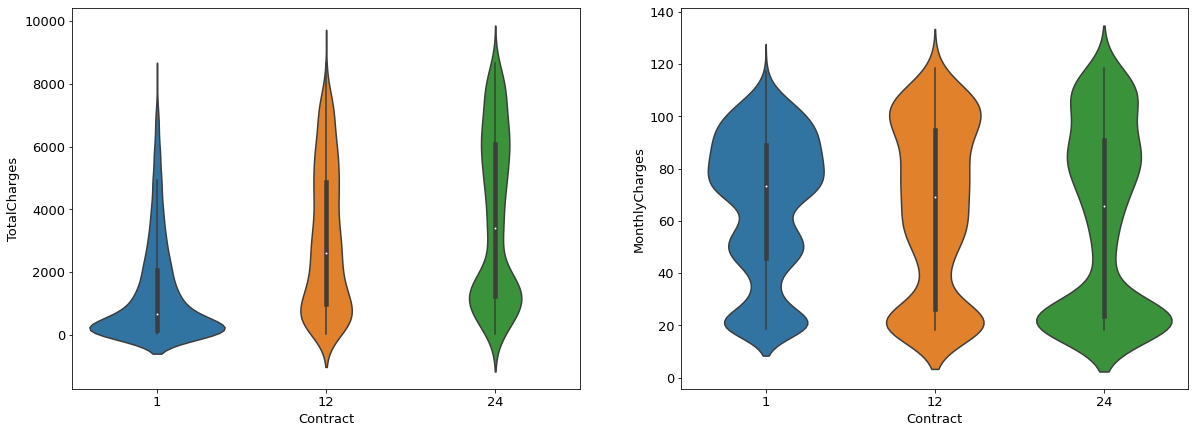

In [131]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.violinplot(main_df['Contract'], main_df['TotalCharges'])
plt.subplot(1,2,2)
sns.violinplot(main_df['Contract'], main_df['MonthlyCharges'])
plt.show()

---------------
Contract값이 크면 클수록,
- MonthlyCharges는 낮은 곳에 많이 분포되어 있다.   -> 장기 약정 가입자는 할인 혜택을 많이 받기 때문인 것 같다.

- TotalCharges는 아랫쪽부터 윗쪽까지 고루 분포되어 있다.


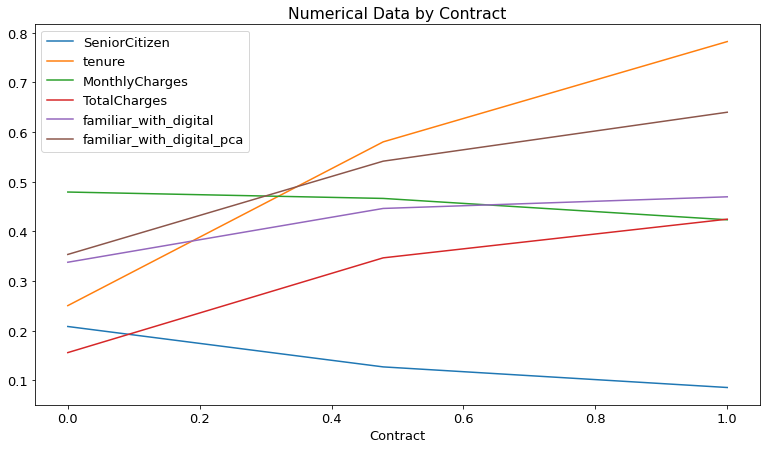

In [132]:
norm_df.groupby('Contract').mean().plot(figsize=(13,7))
plt.title("Numerical Data by Contract")
plt.show()

-------------
Contract값이 높아질수록,
- MonthlyCharges를 제외한 모든 컬럼의 값은 증가한다.
- familiar_with_digital 과 pca를 비교했을 때, pca를 적용한 디지털 친화도가 Contract에 따라 값의 변화가 더 명확하다.

## 수치형 컬럼들의 상관관계

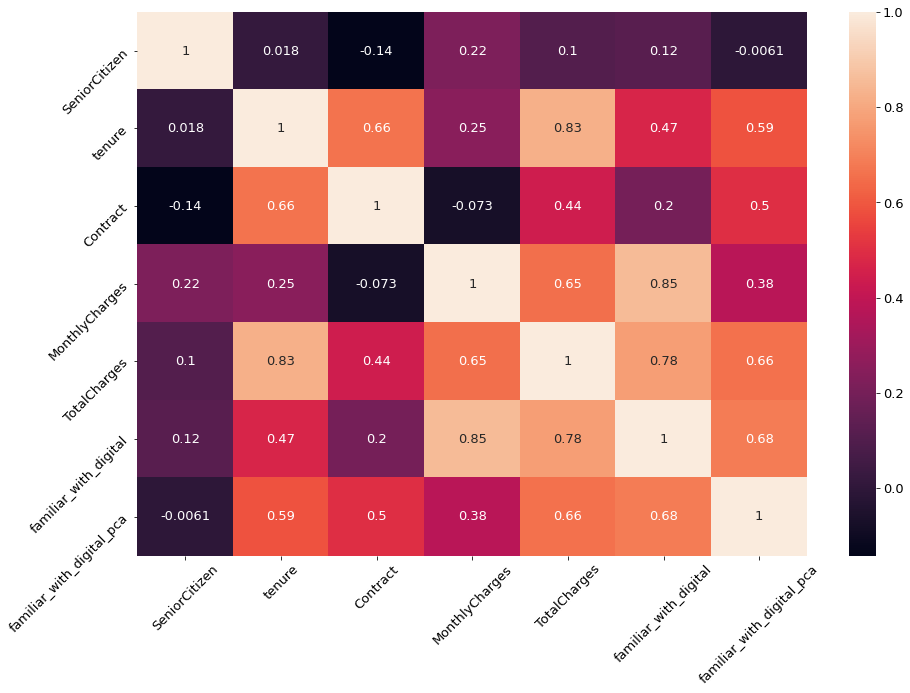

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(main_df.corr(), annot=True)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

-------------
- familiar_with_digital은 Charges 컬럼들과 상관 계수가 크게 나타났다.
- famliar_with_digital_pca는 Charges 컬럼들과의 상관 계수가 familiar_with_digital보다 낮다.
- 강한 상관 관계를 보이는(기준: 상관 계수 절댓값 0.7이상) 컬럼이 2개 이상이 있는 TotalCharges와 familiar_with_digital은 feature selection에서 제외해야겠다.

## gender와 Churn의 상관관계

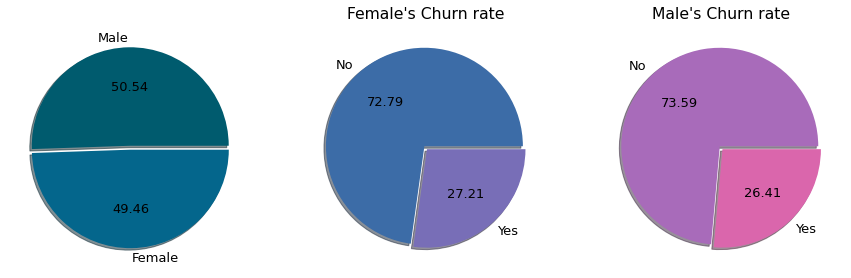

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pie(main_df.gender.value_counts(), autopct="%.2f", labels =main_df.gender.value_counts().keys(),explode=explodes,shadow=True,colors = color_dic[0])
#남녀 Yes/No 비율
fe = main_df.loc[main_df.gender=='Female']
ma = main_df.loc[main_df.gender=='Male']
plt.subplot(1,3,2)
plt.title("Female's Churn rate")
plt.pie(fe.Churn.value_counts(), labels = fe.Churn.value_counts().keys(), autopct = "%.2f", explode=explodes,shadow=True,colors =color_dic[1])
plt.subplot(1,3,3)
plt.title("Male's Churn rate")
plt.pie(ma.Churn.value_counts(), labels = ma.Churn.value_counts().keys(), autopct = "%.2f",explode=explodes,shadow=True, colors =color_dic[2])
plt.show()

------------
성비가 비슷하고, 성별로 계약 해지여부 비율도 비슷하다

In [135]:
pd.pivot_table(main_df, index=['gender','Churn'])

Contract  MonthlyCharges  SeniorCitizen  TotalCharges  \
gender Churn                                                           
Female No     11.039857       61.680231       0.129932   2566.927880   
       Yes     2.394456       74.834062       0.255864   1438.318017   
Male   No     10.878086       60.888156       0.127315   2492.625733   
       Yes     2.719355       74.066989       0.253763   1623.491559   

              familiar_with_digital  familiar_with_digital_pca     tenure  
gender Churn                                                               
Female No                  4.201674                   0.204126  37.371861  
       Yes                 4.073561                  -0.484841  16.945629  
Male   No                  4.104552                   0.142364  36.890432  
       Yes                 4.068817                  -0.458471  18.963441

--------------------------
성별에 상관없이 해지를 하지 않은 사람들은 해지한 사람들에 비해 
- 계약기간이 길다.
- 월지불금액이 낮다. 
- 총지불금액이 높다.
- 근속월수가 길다. 
- 디지털 친화도(기존, pca)가 높다.

## SeniorCitizen과 Churn의 상관관계

* 우선, SeniorCitizen의 나이 기준은 정해진 것이 없는데, 대부분 약 60대부터 해당된다고 한다.  참고: https://www.seniorliving.org/life/senior-citizen/
 <br><br>->The age of a senior citizen varies according to the source. For example, according to Medicare, a senior is 65 years old or older. However, Social Security benefits are eligible for seniors starting at 62, even though the Social Security Office reports that 67 is the age of retirement. Yet if you are 55 and you visit an Arby’s or McDonald’s you can get a senior discount. By the way, Burger King requires you to be at least 60.

In [136]:
main_df.loc[main_df.SeniorCitizen == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_bin,familiar_with_digital,familiar_with_digital_pca
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,1,Yes,Electronic check,39.65,39.65,Yes,0,3,-0.291243
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,No,24,Yes,Credit card (automatic),96.35,6766.95,No,4,7,0.956898
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,1,Yes,Credit card (automatic),95.50,181.65,No,0,5,0.399777
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,1,No,Bank transfer (automatic),45.25,45.25,No,0,2,-2.397030
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,1,Yes,Electronic check,90.25,3838.75,No,3,5,-0.142173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,1,Yes,Electronic check,103.50,6479.40,No,4,7,1.674286
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,Yes,1,Yes,Electronic check,44.40,263.05,No,0,3,-0.250674
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,12,No,Credit card (automatic),60.00,3316.10,No,3,5,-0.645798
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,1,Yes,Electronic check,75.75,75.75,Yes,0,3,-1.730626


In [137]:
pd.pivot_table(main_df, index=['SeniorCitizen'])

,Contract,MonthlyCharges,TotalCharges,familiar_with_digital,familiar_with_digital_pca,tenure
SeniorCitizen,,,,,,
0,9.299812,61.867098,2157.327394,4.008737,0.003447,31.791160
1,5.642226,79.978975,2798.566608,4.758834,-0.017776,32.996466


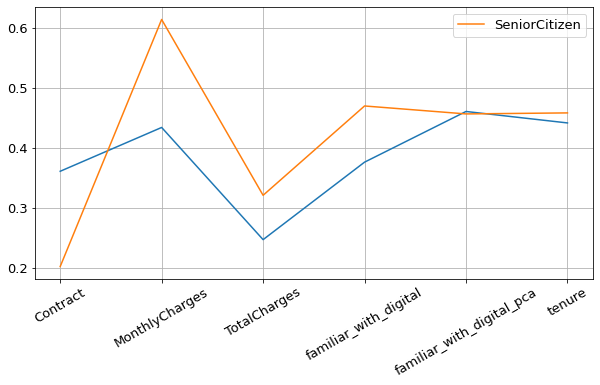

In [138]:
common = pd.pivot_table(norm_df, index=['SeniorCitizen']).transpose()
plt.figure(figsize=(10,5))
plt.plot(common[0])
plt.plot(common[1], label='SeniorCitizen')
plt.xticks(rotation=30)
plt.grid()
plt.legend(loc='upper right')
plt.show()

---------------
SeniorCitizen인 사람들(1)이 그렇지 않은 사람들(0)보다 
- 계약기간이 짧다. 
- 더 높은 금액(Total, Monthly 모두)을 지불하고 있다. 
- tenure와 familiar_with_digital이 조금 더 높다.
- familiar_with_digital_pca가 조금 더 낮다. (기존 디지털 친화도와 반대)
- TotalCharges의 차이보다 MonthlyCharges의 차이가 크다.


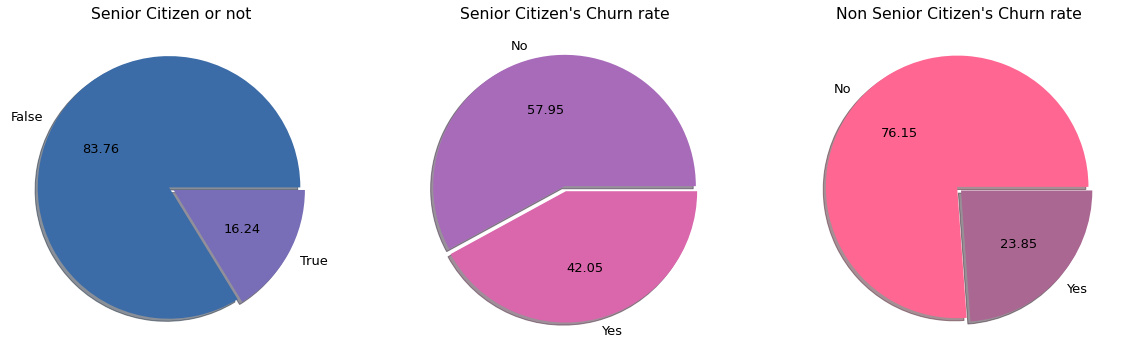

In [139]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Senior Citizen or not")
plt.pie(main_df.SeniorCitizen.value_counts(), autopct = "%.2f",explode=explodes,shadow=True,labels = ['True'if k==1 else 'False' for k in main_df.SeniorCitizen.value_counts().keys()], 
        colors =color_dic[1])
plt.subplot(1,3,2)
plt.title("Senior Citizen's Churn rate")
plt.pie(main_df.loc[main_df.SeniorCitizen==1].Churn.value_counts(), explode=explodes,shadow=True,autopct = "%.2f",labels = main_df.loc[main_df.SeniorCitizen==1].Churn.value_counts().keys(), 
        colors =color_dic[2])
plt.subplot(1,3,3)
plt.title("Non Senior Citizen's Churn rate")
plt.pie(main_df.loc[main_df.SeniorCitizen==0].Churn.value_counts(), explode=explodes,shadow=True,autopct = "%.2f",labels = main_df.loc[main_df.SeniorCitizen==0].Churn.value_counts().keys(), 
        colors =color_dic[3])

plt.show()

---------------
- Senior Citizen은 전체 고객의 16.21%에 해당하고, 이들 중 해지한 사람은 41.68%이다.<br>
- Senior Citizen이 아닌 사람들 중 해지한 사람은 23.61%이다.<br>

***즉, Senior Citizen인 경우 Churn = 'Yes'일 확률이 높아진다.***

## Partner와 Churn의 상관관계

In [140]:
main_df.Partner.value_counts()

No     3625
Yes    3344
Name: Partner, dtype: int64

In [141]:
pd.pivot_table(main_df, index=['Partner'])

,Contract,MonthlyCharges,SeniorCitizen,TotalCharges,familiar_with_digital,familiar_with_digital_pca,tenure
Partner,,,,,,,
No,6.054345,61.949062,0.156138,1573.273297,3.699034,-0.314171,23.160828
Yes,11.579844,67.909420,0.169258,3007.530413,4.598385,0.340572,41.554725


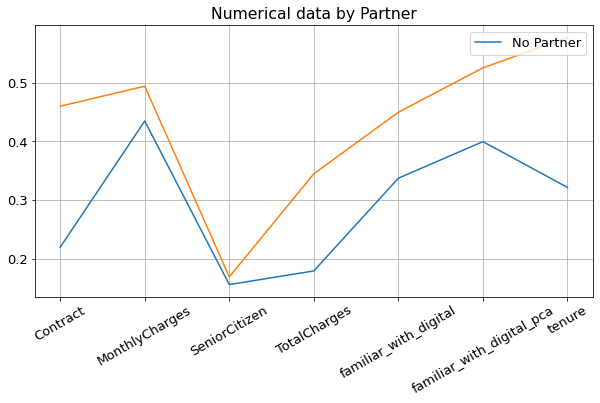

In [142]:
common = pd.pivot_table(norm_df, index=['Partner']).transpose()
plt.figure(figsize=(10,5))
plt.plot(common['No'],label='No Partner')
plt.plot(common['Yes'])
plt.xticks(rotation=30)
plt.grid()
plt.legend(loc='upper right')
plt.title("Numerical data by Partner")
plt.show()

--------
배우자가 있는 고객은 배우자가 없는 고객보다 ,
- Contract가 길다. 
- 더 많은 금액을 지불하고 있다.(Total,Monthly 모두) 
- familiar_with_digital이 높다.
- tenure이 길다.
- familiar_with_digital_pca가 높다.

<br> *뭐든 다 높다.
<br>
*특히 Contract와 TotalCharges 그리고 tenure의 값이 압도적으로 높다.


In [143]:
pd.pivot_table(main_df,index= ['Partner','Churn'])

Contract  MonthlyCharges  SeniorCitizen  TotalCharges  \
Partner Churn                                                           
No      No      8.085773       57.247093       0.118763   1812.923443   
        Yes     1.949167       71.450958       0.231667   1088.980292   
Yes     No     13.560164       64.930344       0.137519   3178.239387   
        Yes     3.646707       79.843563       0.296407   2323.672305   

               familiar_with_digital  familiar_with_digital_pca     tenure  
Partner Churn                                                               
No      No                  3.668454                  -0.132643  28.101443  
        Yes                 3.760833                  -0.681010  13.176667  
Yes     No                  4.590807                   0.449484  45.306428  
        Yes                 4.628743                  -0.095729  26.525449

----------------------
위 테이블을 보면, <br>
배우자유무에 상관없이, 해지한 고객에 비해 해지하지 않은 고객들이
1. 약정기간이 길고, 
2. 월지불금액은 낮지만 전체지불금액이 높고, 
3. familiar_with_digital이 아주 조금 더 낮고, pca는 더 크다. 
4. 근속월수가 길다.
<br><br>


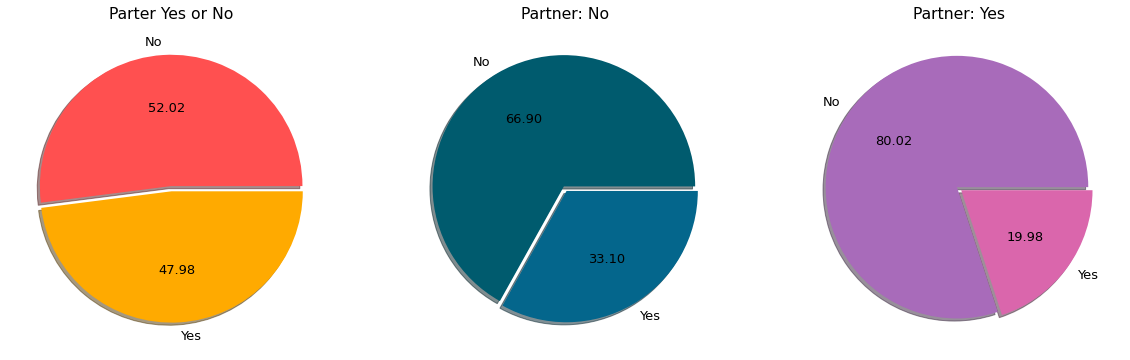

In [144]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('Parter Yes or No')
plt.pie(main_df.Partner.value_counts(), autopct= "%.2f", explode=explodes,shadow=True,labels = main_df.Partner.value_counts().keys(), colors=color_dic[5])
plt.subplot(1,3,2)
plt.title("Partner: No")
plt.pie(main_df.loc[main_df.Partner == 'No'].Churn.value_counts(),explode=explodes,shadow=True,autopct = '%.2f',labels=main_df.loc[main_df.Partner == 'No'].Churn.value_counts().keys(),colors = color_dic[0])
plt.subplot(1,3,3)
plt.title("Partner: Yes")
plt.pie(main_df.loc[main_df.Partner == 'Yes'].Churn.value_counts(),explode=explodes,shadow=True,autopct = '%.2f',labels=main_df.loc[main_df.Partner == 'Yes'].Churn.value_counts().keys(),colors = color_dic[2])
plt.show()

--------------------------------
배우자가 있는 사람보다 없는 사람의 해지비율이 더 높다.


## MonthlyCharges와 Churn의 상관관계

In [145]:
main_df.MonthlyCharges.describe()

count    6969.000000
mean       64.809076
std        30.244084
min        18.250000
25%        35.150000
50%        70.550000
75%        90.000000
max       118.750000
Name: MonthlyCharges, dtype: float64

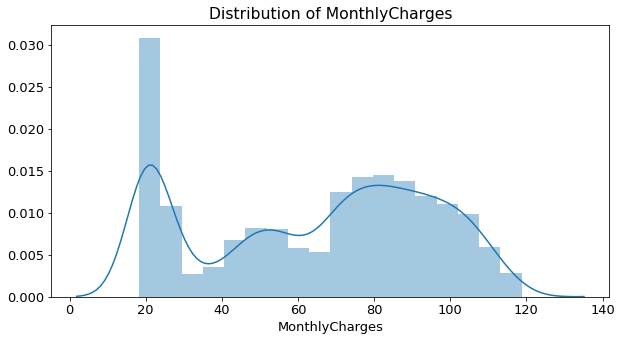

In [146]:
plt.figure(figsize=(10,5))
plt.title("Distribution of MonthlyCharges")
sns.distplot(main_df.MonthlyCharges)
plt.show()

--------------------------
MonthlyCharges의 값을 특정 구간으로 나눈 MonthlyCharges_bin이라는 컬럼을 하나 더 만들어서 살펴보자

- MonthlyCharges_bin

In [147]:
#백분율 10%단위로 구간 나누기
bins = [0]
for i in range(1,11,1):
    bins.append(main_df.MonthlyCharges.quantile(0.1*i))
main_df['MonthlyCharges_bin'] = pd.cut(main_df.MonthlyCharges, bins, labels = list(range(len(bins)-1)))
pd.DataFrame(bins)

,0
0,0.00
1,20.05
2,25.00
3,45.57
4,58.60
5,70.55
6,79.25
7,85.70
8,94.40
9,102.91


In [148]:
#각 구간에 해당하는 고객이 몇명인지
pd.DataFrame(main_df.MonthlyCharges_bin.value_counts())

,MonthlyCharges_bin
0,717
7,702
5,700
3,700
6,698
9,697
4,694
1,689
8,687
2,685


--------------------
MonthlyCharges값을 백분율 10%단위로 끊어서 MonthlyCharges_bin컬럼을 만들어보았다. 

In [149]:
pd.pivot_table(main_df, index=['MonthlyCharges_bin', 'Churn'])

Contract  MonthlyCharges  SeniorCitizen  \
MonthlyCharges_bin Churn                                             
0                  No     12.875000       19.630335       0.028963   
                   Yes     2.475410       19.622131       0.065574   
1                  No     13.552167       21.735393       0.032103   
                   Yes     2.530303       21.861364       0.060606   
2                  No     10.449807       34.385425       0.094595   
                   Yes     1.664671       37.484431       0.245509   
3                  No      6.536822       52.401938       0.091085   
                   Yes     2.038043       51.497283       0.114130   
4                  No      9.189036       65.224764       0.100189   
                   Yes     2.545455       67.645152       0.224242   
5                  No      9.344111       75.043303       0.182448   
                   Yes     1.498127       75.086330       0.295880   
6                  No     10.645012       82.361369       0.162413   
                   Yes     1.838951       82.498876       0.277154   
7                  No     10.017241       90.108513       0.204741   
                   Yes     2.033613       90.270588       0.289916   
8                  No      9.699507       98.230911       0.248768   
                   Yes     2.423488       98.216904       0.348754   
9                  No     15.502857      108.801143       0.234286   
                   Yes     7.720930      106.868605       0.284884   

                          TotalCharges  familiar_with_digital  \
MonthlyCharges_bin Churn                                        
0                  No       557.844893               1.000000   
                   Yes      154.021311               1.000000   
1                  No       722.369823               1.280899   
                   Yes      142.950758               1.090909   
2                  No      1048.233205               2.503861   
                   Yes      388.034132               2.281437   
3                  No      1396.548450               3.798450   
                   Yes      620.654620               3.375000   
4                  No      2109.899149               4.856333   
                   Yes      777.568182               3.054545   
5                  No      2598.492263               4.993072   
                   Yes      849.679775               3.243446   
6                  No      3420.953364               5.573086   
                   Yes     1338.069476               3.992509   
7                  No      4010.352263               6.019397   
                   Yes     1662.917647               4.819328   
8                  No      4544.124507               6.036946   
                   Yes     2544.068327               5.768683   
9                  No      6476.740571               7.796190   
                   Yes     4872.510756               7.360465   

                          familiar_with_digital_pca     tenure  
MonthlyCharges_bin Churn                                        
0                  No                     -0.013890  28.304878  
                   Yes                    -0.013890   7.786885  
1                  No                      0.080432  32.462279  
                   Yes                    -0.529387   6.469697  
2                  No                     -0.604652  31.677606  
                   Yes                    -1.368751  10.485030  
3                  No                     -0.856327  26.443798  
                   Yes                    -1.196134  11.820652  
4                  No                     -0.260925  32.395085  
                   Yes                    -1.559485  11.812121  
5                  No                     -0.181300  34.600462  
                   Yes                    -1.477111  11.292135  
6                  No                      0.268659  41.519722  
                   Yes                    -0.830814  16.194757  
7              

In [150]:
tmp_df = pd.DataFrame({'MonthlyCharges_bin':[],'Churn rate':[]})
for i in range(10):
    target = main_df.loc[main_df.MonthlyCharges_bin == i].Churn.value_counts()
    tmp_df = tmp_df.append({'MonthlyCharges_bin':i,'Churn rate':round(target['Yes']/target.sum()*100,2)},ignore_index=True)

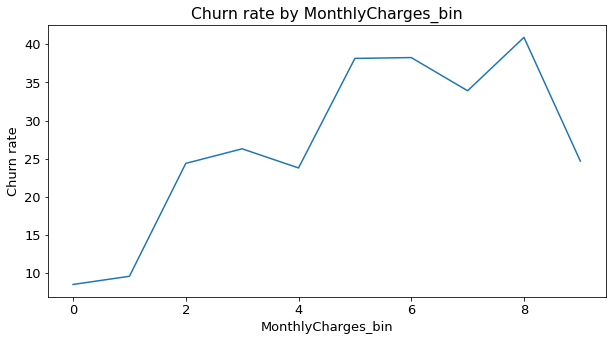

In [151]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tmp_df['MonthlyCharges_bin'], y= tmp_df['Churn rate'])
plt.title("Churn rate by MonthlyCharges_bin")
plt.show()

-----------------
MonthlyCharges_bin의 값과 해지율이 선형적인 관계를 가질 줄 알았다.<br>
하지만 bin이 5-8인경우에 해지율이 가장 높고, bin이 0-1인경우 해지율이 가장 낮았다. 나머지는 20%대로 비슷하다.<br>
해당 컬럼도 충분히 의미 있을 수 있지만, 선형적인 관계를 만들어보고 싶기에 MonthlyCharges_bin2 컬럼을 만들어보기로 했다.

- MonthlyCharges_bin2

In [152]:
bins = [0,main_df.MonthlyCharges.quantile(.35),main_df.MonthlyCharges.quantile(.65),
        main_df.MonthlyCharges.quantile(1)]
bins

[0, 51.389999999999986, 81.95, 118.75]

In [153]:
main_df['MonthlyCharges_bin2'] = pd.cut(main_df.MonthlyCharges, bins, labels = list(range(len(bins)-1)))
main_df.MonthlyCharges_bin2.value_counts()

0    2439
2    2437
1    2093
Name: MonthlyCharges_bin2, dtype: int64

-------
0,백분율 35%의 값, 65%의 값, 최댓값을 구간의 경계값으로 설정했다. 각 구간에 속한 고객수는 2000대 초반~중반으로 맞추었다.


In [154]:
pd.pivot_table(main_df, index=['MonthlyCharges_bin2', 'Churn'])

Contract  MonthlyCharges  SeniorCitizen  \
MonthlyCharges_bin2 Churn                                             
0                   No     11.588524       27.558436       0.053458   
                    Yes     1.925000       35.210000       0.155000   
1                   No      9.087225       68.531834       0.129121   
                    Yes     1.998430       71.730691       0.240188   
2                   No     11.852428       97.511706       0.223537   
                    Yes     3.287605       95.427437       0.314079   

                           TotalCharges  familiar_with_digital  \
MonthlyCharges_bin2 Churn                                        
0                   No       807.599362               1.751349   
                    Yes      323.023250               2.077500   
1                   No      2313.807280               4.835852   
                    Yes      873.613972               3.359498   
2                   No      4910.155324               6.580946   
                    Yes     2615.268412               5.576414   

                           familiar_with_digital_pca     tenure  
MonthlyCharges_bin2 Churn                                        
0                   No                     -0.260248  29.931339  
                    Yes                    -1.043004   8.950000  
1                   No                     -0.264830  33.345467  
                    Yes                    -1.342654  12.365777  
2                   No                      1.119176  49.691781  
                    Yes                     0.470894  26.563177

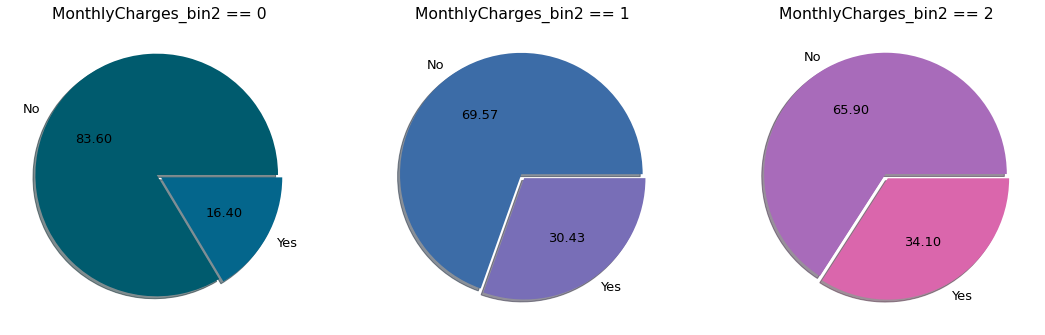

In [155]:
plt.figure(figsize=(25,20))

for e in range(3):
    plt.subplot(3,4,e+1)
    target =main_df.loc[main_df.MonthlyCharges_bin2 == e].Churn.value_counts() 
    plt.pie(target, explode=explodes,shadow=True,autopct="%.2f", labels =target.keys(),colors=color_dic[e])
    plt.title(f"MonthlyCharges_bin2 == {e}")
plt.show()


In [156]:
def get_pct(target): #target: 컬럼, 컬럼의 값(unique)에 따른 해지율 구하기 
    pct= {}
    for i in main_df[target].unique():
        val_c = main_df.loc[main_df[target]==i].Churn.value_counts()
        pct[i] = round(val_c['Yes']/val_c.sum()*100,2)#churn rate
    return pct

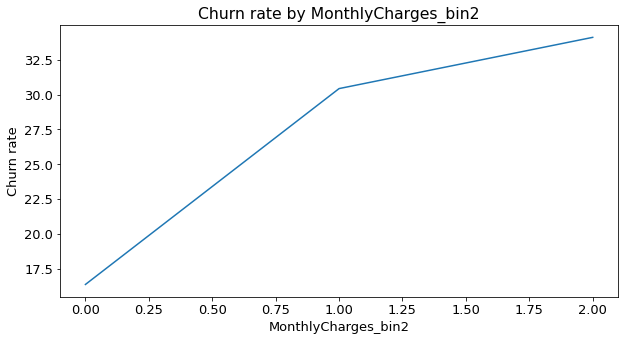

In [157]:

pct=get_pct('MonthlyCharges_bin2')
plt.figure(figsize=(10,5))
sns.lineplot(x=list(range(3)), y=list(pct.values()))
plt.title("Churn rate by MonthlyCharges_bin2")
plt.xlabel("MonthlyCharges_bin2")
plt.ylabel('Churn rate')
plt.show()

-----------
이렇게 세구간으로 나누니 bin값이 커질수록 해지율이 높아지는 선형적인 관계를 가지게 되었다.<br>


In [158]:
main_df['MonthlyCharges_bin2']=main_df.MonthlyCharges_bin2.astype('int')

--------------------------------------------------------
따라서 MonthlyCharges_bin2값의 크기가 의미를 가지므로 category -> int로 형변환을 해주었다.

## Dependents와 Churn의 상관관계

In [159]:
main_df.Dependents.value_counts()

No     4891
Yes    2078
Name: Dependents, dtype: int64

In [160]:
pd.pivot_table(main_df, index=['Dependents'])

,Contract,MonthlyCharges,MonthlyCharges_bin2,SeniorCitizen,TotalCharges,familiar_with_digital,familiar_with_digital_pca,tenure
Dependents,,,,,,,,
No,7.208546,67.058137,1.050501,0.212840,2170.899867,4.142916,-0.097681,29.476385
Yes,12.229548,59.515448,0.880173,0.043792,2474.699783,4.101540,0.229911,37.896054


----------------------
부양가족이 있는 고객들이 없는 고객에 비해 
- Contract가 짧다. 
- MonthlyCharges가 낮다.
- TotalCharges가 높다. 
- tenure이 길다.
- familiar_with_digital_pca가 높다.

***-> 위 분석을 통해 familiar_with_digital은 특징을 잘 나타내는 피처가 아니라고 판단했으므로 삭제할 예정이다.***<br><br>
***-> 부양가족이 있는 고객들의 해지율이 낮을 것으로 예상한다***


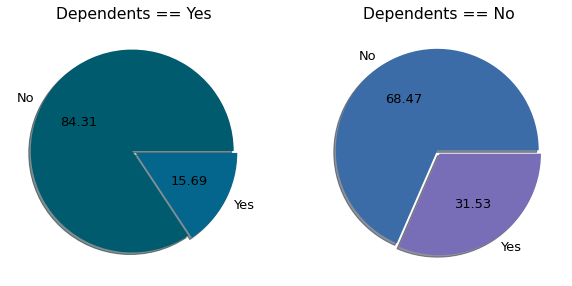

In [161]:
target_yes = main_df.loc[main_df.Dependents=='Yes'].Churn.value_counts()
target_yes = main_df.loc[main_df.Dependents=='No'].Churn.value_counts()
plt.figure(figsize=(10,10))
for e,ans in enumerate(['Yes','No']):
    plt.subplot(1,2,e+1)
    target= main_df.loc[main_df.Dependents==ans,'Churn'].value_counts()
    plt.pie(target, autopct='%.2f',explode=explodes,shadow=True, labels=target.keys(),colors=color_dic[e])
    plt.title(f"Dependents == {ans}")

plt.show()

-----------------
예상대로 부양가족이 있는 고객들의 해지율이 더 낮다.

## PaymentMethod와 Churn의 상관관계

In [162]:
pd.pivot_table(main_df, index=['PaymentMethod'])

,Contract,MonthlyCharges,MonthlyCharges_bin2,SeniorCitizen,TotalCharges,familiar_with_digital,familiar_with_digital_pca,tenure
PaymentMethod,,,,,,,,
Bank transfer (automatic),11.960849,67.363338,1.063703,0.151294,3050.710285,4.605176,0.328161,43.041141
Credit card (automatic),12.506676,66.609379,1.055407,0.144860,3053.106709,4.649533,0.373398,42.864486
Electronic check,4.197368,76.316384,1.289049,0.251698,2082.948599,4.412564,-0.246923,25.009338
Mailed check,8.719527,43.877892,0.463930,0.058458,1045.955379,2.789179,-0.293619,21.717040


In [163]:
common = main_df['PaymentMethod'].value_counts()

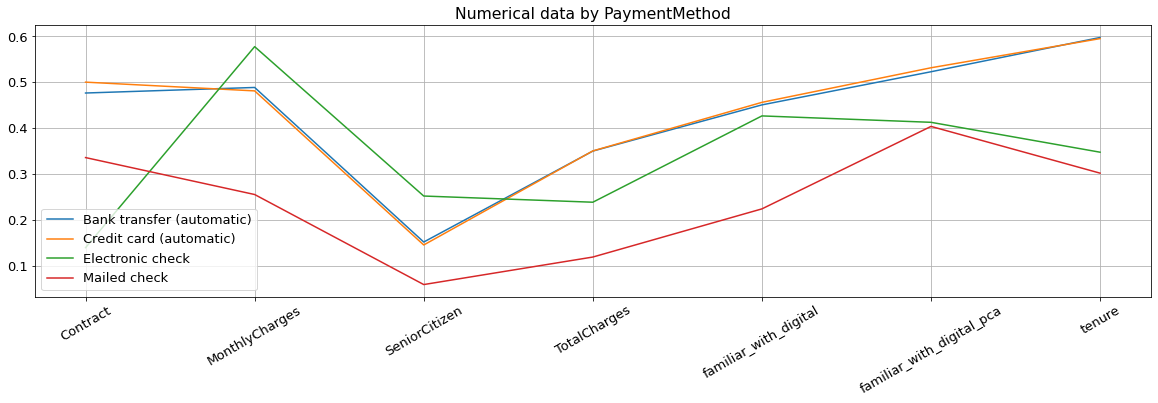

In [164]:
pct = get_pct('PaymentMethod')
pd.pivot_table(norm_df, index=['PaymentMethod']).transpose().plot(figsize=(20,5),grid=True)
plt.title("Numerical data by PaymentMethod")
plt.xticks(rotation=30)
plt.legend(loc='lower left')
plt.show()

------------------
- Bank transfer와 Credit card는 수치형 컬럼들의 값들이 비슷한 추세를 보이고 있다. 
- Electronic check는 Contract값이 가장 작고, MonthlyCharges값은 가장 크다.
- Mailed check는 Contract를 제외하고 모든 컬럼값이 가장 작다.

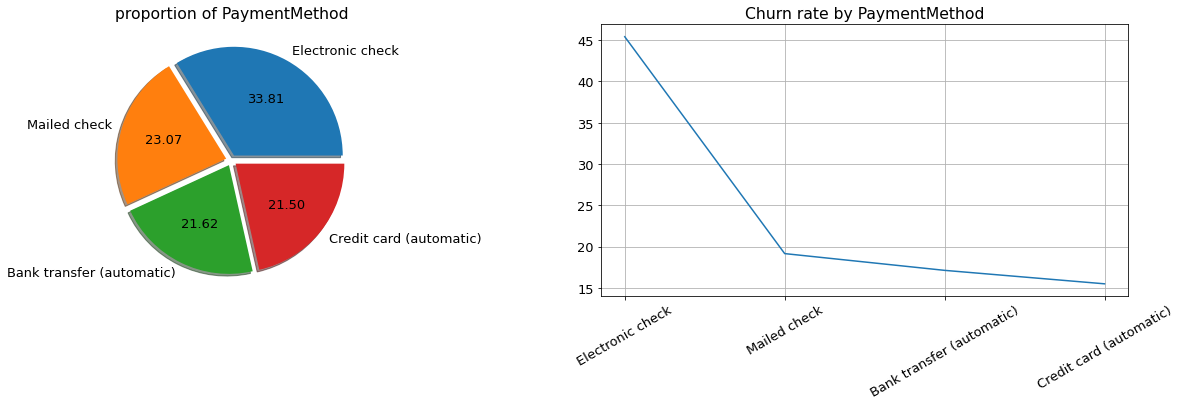

In [165]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(right=1.2)
plt.subplot(1,2,1)
plt.title("proportion of PaymentMethod")
plt.pie(common,labels = common.keys(),explode=[0.05 for _ in range(len(common))],shadow=True,autopct = "%.2f")
plt.subplot(1,2,2)
plt.title("Churn rate by PaymentMethod")
plt.plot(pd.DataFrame(pct.values(),columns=['churn rate'],index = pct.keys()))
plt.grid()
plt.xticks(rotation=30)
plt.show()

---------------------------
- 결제 방식이 Electronic check인 고객이 가장 많다. 
- 결제 방식에 따른 해지율을 보았을 때, Electronic check가 압도적으로 높다. 

In [166]:
pd.pivot_table(main_df, index=['PaymentMethod','Churn'])

Contract  MonthlyCharges  \
PaymentMethod             Churn                              
Bank transfer (automatic) No     13.540432       65.191873   
                          Yes     4.313953       77.875581   
Credit card (automatic)   No     14.022907       64.640008   
                          Yes     4.232759       77.356034   
Electronic check          No      6.095645       74.313258   
                          Yes     1.915888       78.723879   
Mailed check              No     10.300769       41.347731   
                          Yes     2.045455       54.557143   

                                 MonthlyCharges_bin2  SeniorCitizen  \
PaymentMethod             Churn                                       
Bank transfer (automatic) No                1.012810       0.140112   
                          Yes               1.310078       0.205426   
Credit card (automatic)   No                1.007109       0.122433   
                          Yes               1.318966       0.267241   
Electronic check          No                1.238725       0.214619   
                          Yes               1.349533       0.296262   
Mailed check              No                0.411538       0.038462   
                          Yes               0.685065       0.142857   

                                 TotalCharges  familiar_with_digital  \
PaymentMethod             Churn                                        
Bank transfer (automatic) No      3212.016533               4.626902   
                          Yes     2269.812984               4.500000   
Credit card (automatic)   No      3181.906833               4.643760   
                          Yes     2350.257759               4.681034   
Electronic check          No      2600.146151               4.625972   
                          Yes     1461.344813               4.156075   
Mailed check              No      1167.244077               2.749231   
                          Yes      534.022565               2.957792   

                                 familiar_with_digital_pca     tenure  
PaymentMethod             Churn                                        
Bank transfer (automatic) No                      0.423396  46.501201  
                          Yes                    -0.132876  26.290698  
Credit card (automatic)   No                      0.466603  45.676145  
                          Yes                    -0.135209  27.521552  
Electronic check          No                     -0.013972  31.912908  
                          Yes                    -0.526900  16.712150  
Mailed check              No                     -0.169549  24.953846  
                          Yes                    -0.817290   8.055195

<br><br>
## 정리

여기까지, 각 컬럼과 Churn컬럼의 상관관계를 알아보았다.<br>
정리하자면,<br>
각 컬럼이 다음에 해당될수록 해지하지 않을 확률이 더 높은 것으로 볼 수 있겠다.

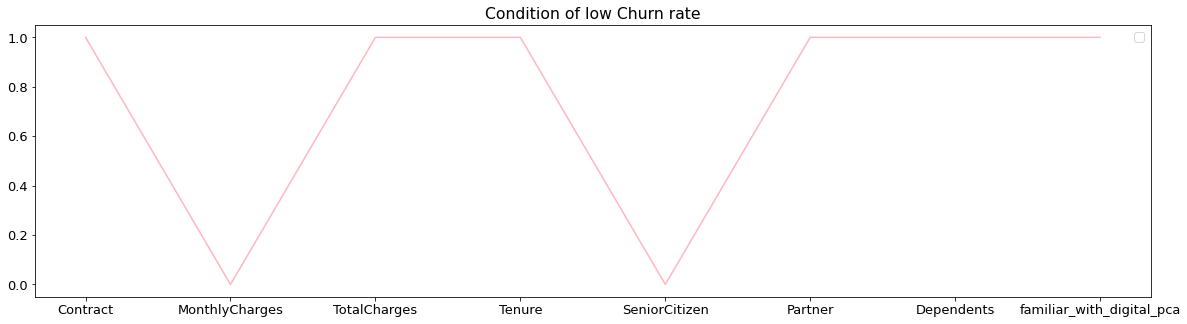

In [167]:
pd.DataFrame({'Contract':1, 'MonthlyCharges':0,'TotalCharges':1,'Tenure':1,
              'SeniorCitizen':0, 'Partner':1, 'Dependents':1,'familiar_with_digital_pca':1}.items()).set_index(0).plot(figsize=(20,5),color='lightpink')
plt.title("Condition of low Churn rate")
plt.xlabel("")
plt.legend("")
plt.show()

------------------------

1. Contract가 길다.
2. MonthlyCharges는 낮고 TotalCharges는 높다.
3. Tenure이 길다.
4. SeniorCitizen이 No다.
5. Partner가 Yes다.
6. Dependents가 Yes다.
7. familiar_with_digital_pca가 높다.
8. PaymentMethod가 Electronic check가 아니다.

<br><br>
## SeniorCitizen과 Partner의 상관관계

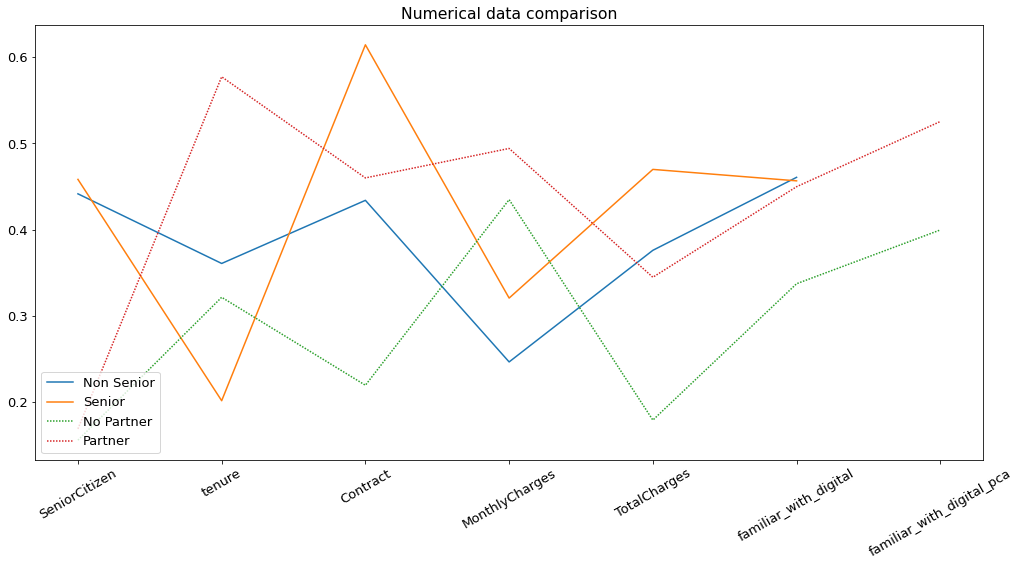

In [168]:
fig = plt.figure(figsize=(17,8))
ax1=fig.add_subplot(1,1,1)
plt.title("Numerical data comparison")
norm_df.groupby('SeniorCitizen').mean().transpose().plot(ax=ax1)
norm_df.groupby('Partner').mean().transpose().plot(linestyle=(0, (1, 1)),ax=ax1)
plt.legend(labels=['Non Senior','Senior','No Partner','Partner'],loc='lower left')
plt.xticks(rotation=30)
plt.show()

- Non SeniorCitizen이면서 Partner가 있는 고객은 해지율이 낮을 것이다.

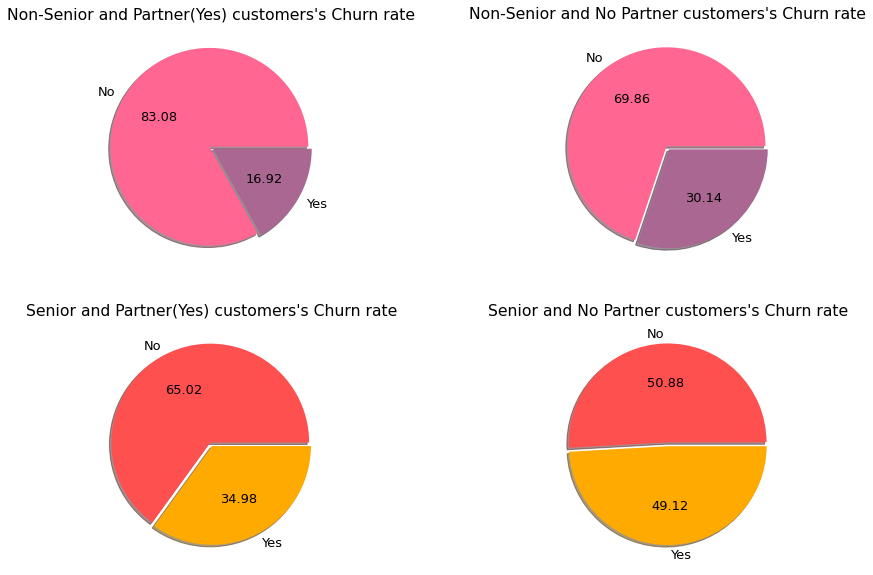

In [169]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.pie(main_df.loc[main_df.SeniorCitizen == 0].loc[main_df.Partner == 'Yes'].Churn.value_counts(),autopct= "%.2f", shadow=True, explode=[0.02,0.02],labels=['No','Yes'],colors=color_dic[3])
plt.title("Non-Senior and Partner(Yes) customers's Churn rate")
plt.subplot(2,2,2)
plt.pie(main_df.loc[main_df.SeniorCitizen == 0].loc[main_df.Partner == 'No'].Churn.value_counts(),autopct= "%.2f", shadow=True, explode=[0.02,0.02],labels=['No','Yes'],colors=color_dic[3])
plt.title("Non-Senior and No Partner customers's Churn rate")
plt.subplot(2,2,3)
plt.pie(main_df.loc[main_df.SeniorCitizen == 1].loc[main_df.Partner == 'Yes'].Churn.value_counts(),autopct= "%.2f", shadow=True, explode=[0.02,0.02], labels=['No','Yes'],colors=color_dic[5])
plt.title("Senior and Partner(Yes) customers's Churn rate")
plt.subplot(2,2,4)
plt.pie(main_df.loc[main_df.SeniorCitizen == 1].loc[main_df.Partner == 'No'].Churn.value_counts(),autopct= "%.2f", shadow=True, explode=[0.02,0.02], labels=['No','Yes'],colors=color_dic[5])
plt.title("Senior and No Partner customers's Churn rate")
plt.show()

---------

- Partner가 있고 Senior Citizen이 아닌 고객의 해지율이 가장 낮다.(16.65) 
- Senior Citizen+No Partner인 고객은 해지율이 가장 높다.(48.86)
- Non-Senior Citizen이지만, Partner가 없는 고객보다 Senior Citizen이지만 Partner는 있는 고객이 해지율이 더 높다.
    <br> -> Partner보다 Senior Citizen 컬럼의 영향력이 더 큰것이 아닐까?

<br><br><br>
# 모델 적용 및 평가

## DataFrame 확인

In [170]:
main_df.shape

(6969, 26)

In [171]:
one_hot_df.shape

(6969, 49)

In [172]:
label_df.shape

(6969, 22)

- 불필요한 컬럼 제거

In [173]:
out_col = ['familiar_with_digital', 'customerID','TotalCharges','MonthlyCharges_bin','MonthlyCharges']
out_col.extend(main_df.columns[6:15])
out_col

['familiar_with_digital',
 'customerID',
 'TotalCharges',
 'MonthlyCharges_bin',
 'MonthlyCharges',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [174]:
try:
    main_df.drop(out_col, axis=1,inplace=True)
    label_df.drop(out_col,axis=1,inplace=True)
except:
    pass

In [175]:
for c in out_col:
    target_c = list(filter(lambda x: x.startswith(c),one_hot_df.columns))
    one_hot_df.drop(target_c,axis=1,inplace=True)

- 필요한 컬럼 추가

In [176]:
for i in ['familiar_with_digital_pca','MonthlyCharges_bin2']:
    label_df[i] = main_df[i]

In [177]:
one_hot_df['familiar_with_digital_pca'] = main_df['familiar_with_digital_pca']

In [178]:
rename = ['MonthlyCharges_bin_0','MonthlyCharges_bin_1','MonthlyCharges_bin_2']
one_hot_df =  pd.concat([one_hot_df, pd.get_dummies(main_df['MonthlyCharges_bin2'])],axis =1)
one_hot_df

,SeniorCitizen,tenure,Contract,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,familiar_with_digital_pca,0,1,2
0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,-1.444164,1,0,0
1,0,34,12,0,1,1,0,1,0,1,0,0,0,0,1,0,-1.035961,0,1,0
2,0,2,1,0,1,1,0,1,0,0,1,0,0,0,1,1,-1.256770,0,1,0
3,0,45,12,0,1,1,0,1,0,1,0,1,0,0,0,0,-0.083714,1,0,0
4,0,2,1,1,0,1,0,1,0,0,1,0,0,1,0,1,-2.341598,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,12,0,1,0,1,0,1,0,1,0,0,0,1,0,2.094957,0,0,1
7039,0,72,12,1,0,0,1,0,1,0,1,0,1,0,0,0,1.674286,0,0,1
7040,0,11,1,1,0,0,1,0,1,0,1,0,0,1,0,0,-1.630979,1,0,0
7041,1,4,1,0,1,0,1,1,0,0,1,0,0,0,1,1,-1.730626,0,1,0


In [179]:
#column명 바꾸기
one_hot_df.rename(columns = {e: n for e,n in enumerate(rename)},inplace=True)

<br>

## Feature Selection

In [180]:
feature_all = label_df.columns

In [181]:
feature3 = ['familiar_with_digital_pca', 'Contract', 'MonthlyCharges_bin2']
feature4_1 = feature3[:] + ['tenure']
feature4_2 = feature3[:] + ['SeniorCitizen']
feature4_3 = feature3[:] + ['Partner']

In [183]:
def get_one_hot_features(feature):
    tmp_feat = []
    for feat in feature:
        if feat.startswith('Monthly'):
            feat= 'MonthlyCharges_bin'
        for c in one_hot_df.columns:
            if c.startswith(feat):
                tmp_feat.append(c)
    return tmp_feat

In [185]:
#one hot encoding 전용
one_all= one_hot_df.drop('Churn', axis=1).columns #feature_all과 동일
one_3 = get_one_hot_features(feature3)
one_4_1 = get_one_hot_features(feature4_1)
one_4_2 = get_one_hot_features(feature4_2)
one_4_3 = get_one_hot_features(feature4_3)

## Train Test Split

In [186]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state = 0)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(label_df[feature_all],main_df['Churn'],test_size = 0.3,random_state=0)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(one_hot_df[one_all],main_df['Churn'],test_size=0.3,random_state=1)

Using TensorFlow backend.


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import *

lgbm_clf = LGBMClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
dt_clf = DecisionTreeClassifier()
svm_clf = svm.SVC(probability = True)
nb_clf = MultinomialNB()
log_clf = LogisticRegression()

names = ['RF','GB','DT','NB','SVM','LOG','LGBM']
model_dic = {'dt': dt_clf, 'svm':svm_clf, 'nb':nb_clf,'log':log_clf, 'gb':gb_clf, 'rf':rf_clf, 'lgbm':lgbm_clf}
#target_dic = {'smote':[X_smote, Y_smote],'main':[main_df,main_df['Churn']],'over':[X_over,Y_over], 'under':[X_under,Y_under],'one_hot':[X_one_hot_smote, Y_one_hot_smote]}
target_dic= {'label':[X_train_l, y_train_l, X_test_l, y_test_l],'one_hot':[X_train_o,y_train_o,X_test_o, y_test_o]}
feature_dic = {'3':[feature3, one_3], '4_1':[feature4_1, one_4_1], '4_2':[feature4_2, one_4_2], '4_3':[feature4_3, one_4_3]}

In [221]:
#get cross_val_score
def get_score (model=None, feature=None, custom_cv=None, target=None,over=False):
    model = model.lower()
    X,y = target_dic[target][0],target_dic[target][1]
    if over:
        X,y= smote.fit_resample(X,y)
    return cross_val_score(model_dic[model],X[feature],y,cv=custom_cv).mean()

#results visualization
def figure_results(model=None, feature=None,target=None,over=False):
    X,y = target_dic[target][0],target_dic[target][1]
    if over:
        X,y =smote.fit_resample(X,y)
    X_test, y_test = dic[target][2],target_dic[target][3]
    model_dic[model.lower()].fit(X,y)
    
    predictions = model_dic[model.lower()].predict(X_test)
    probabilities = model_dic[model.lower()].predict_proba(X_test)
    auc_score = roc_auc_score(y_test,predictions)
    
    conf_matrix = confusion_matrix(y_test,predictions)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[::,1])
    print (f"\n {model.upper()} Classification report : \n",classification_report(y_test,predictions))
    plt.figure(figsize=(20,5))
    plt.subplot(2,2,1)
    plt.subplots_adjust(top=0.8)
    plt.suptitle(f"input:{target}, model:{model}\n\n",fontsize=20)
    plt.title("confusion matrix")
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.ylabel('actual')
    plt.xlabel('predicted')
    
    plt.subplot(2,2,2)
    plt.title(f"roc curve: {round(auc_score,3)}")
    sns.scatterplot(x=fpr,y=tpr)
    sns.lineplot(x=[0,1], y=[0,1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    
    plt.subplot(2,2,3)
    residual = predictions-np,array(y_test)
    sns.distplot(residual)

<br>

## Cross validation Score

In [216]:
def add_results(model, target, feature, cv,over=False):
    if target == 'label':
        score = get_score(model, feature_dic[feature][0], cv, target,over)
    else:
        score = get_score(model, feature_dic[feature][1], cv, target,over)
    tmp = {c:d for c,d in zip(cols, [model, target, feature, cv, score])}
    return tmp

In [217]:
# cols = ['Model', 'Encoding','Feature', 'cv', 'Score']
# cross_res = pd.DataFrame([None,None,None,None,None],index = cols).transpose()
cross_res = pd.read_csv('cross_val_results.csv')

- before resampling

In [195]:
# for model in names[4:]:
#     for feat in feature_dic.keys():
#         cross_res = cross_res.append(add_results(model, 'label',feat,10 ),ignore_index=True)
#         cross_res = cross_res.append(add_results(model, 'one_hot',feat,10 ), ignore_index=True)

In [233]:
cross_res

,Model,Encoding,Feature,cv,Score
0,SVM,label,3,10.0,0.755233
1,SVM,one_hot,3,10.0,0.730013
2,SVM,label,4_1,10.0,0.770601
3,SVM,one_hot,4_1,10.0,0.759125
4,SVM,label,4_2,10.0,0.756259
5,SVM,one_hot,4_2,10.0,0.738620
6,SVM,label,4_3,10.0,0.757897
7,SVM,one_hot,4_3,10.0,0.731447
8,LOG,label,3,10.0,0.750315
9,LOG,one_hot,3,10.0,0.744979


In [234]:
cross_res.to_csv('cross_val_results.csv',index=False)

In [235]:
cross_res_smote = pd.read_csv('cross_val_smote_results.csv')

- after resampling

In [219]:
for model in names[4:]:
    for feat in feature_dic.keys():
        cross_res_smote = cross_res_smote.append(add_results(model, 'label',feat,10 ,True),ignore_index=True)
        cross_res_smote = cross_res_smote.append(add_results(model, 'one_hot',feat,10,True), ignore_index=True)

In [236]:
cross_res_smote

,Model,Encoding,Feature,cv,Score
0,SVM,label,3,10.0,0.754313
1,SVM,one_hot,3,10.0,0.723110
2,SVM,label,4_1,10.0,0.737930
3,SVM,one_hot,4_1,10.0,0.723110
4,SVM,label,4_2,10.0,0.755563
5,SVM,one_hot,4_2,10.0,0.723110
6,SVM,label,4_3,10.0,0.752790
7,SVM,one_hot,4_3,10.0,0.726621
8,LOG,label,3,10.0,0.750015
9,LOG,one_hot,3,10.0,0.754709


In [229]:
cross_res_smote.to_csv('cross_val_smote_results.csv',index=False)

### results

- before resampling

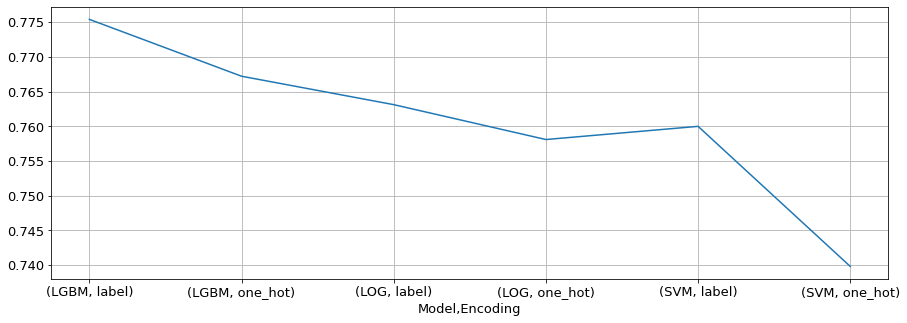

In [266]:
cross_res.groupby(['Model','Encoding']).mean()['Score'].plot(figsize=(15,5),grid=True)
plt.show()

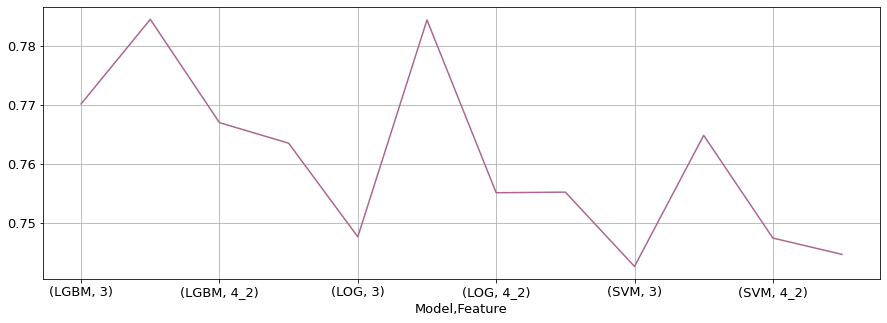

In [251]:
cross_res.groupby(['Model','Feature']).mean()['Score'].plot(figsize=(15,5),color= color_dic[3][1],grid=True)
plt.show()

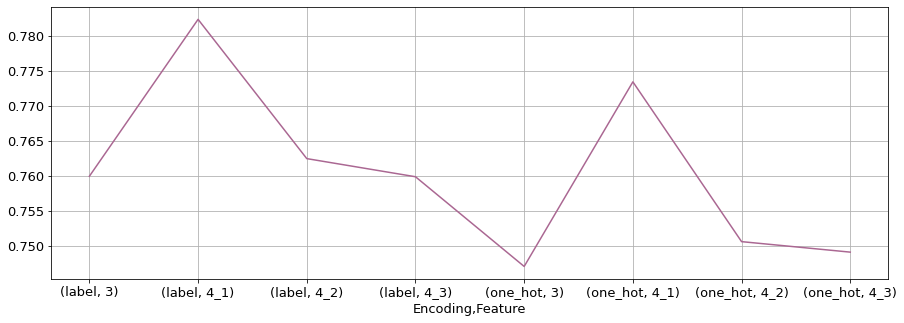

In [267]:
cross_res.groupby(['Encoding','Feature']).mean()['Score'].plot(figsize=(15,5),color= color_dic[3][1],grid=True)
plt.show()

- after resampling

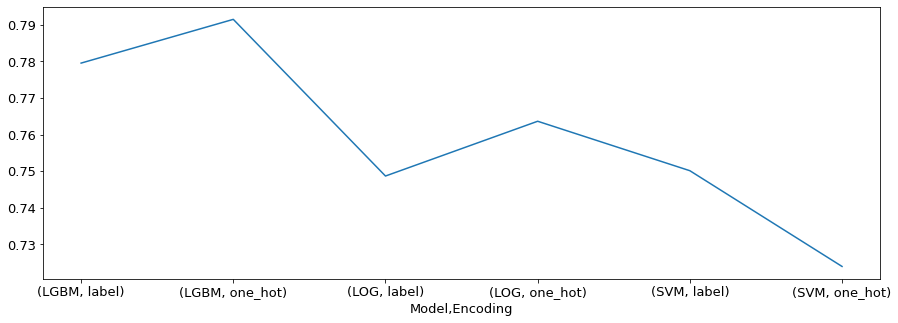

In [264]:
cross_res_smote.groupby(['Model','Encoding']).mean()['Score'].plot(figsize=(15,5))
plt.show()

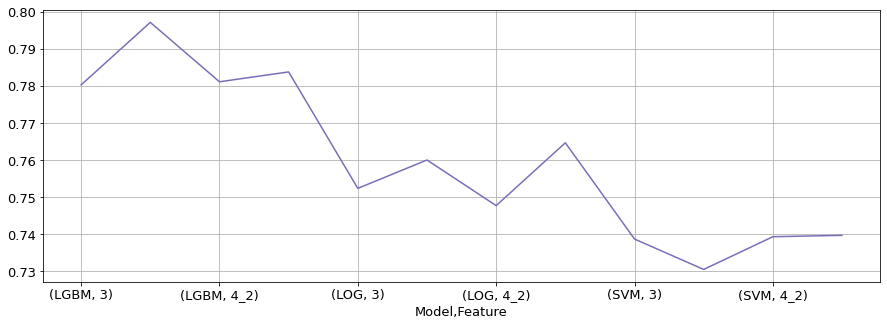

In [252]:
cross_res_smote.groupby(['Model','Feature']).mean()['Score'].plot(figsize=(15,5),color= color_dic[1][1],grid=True)
plt.show()

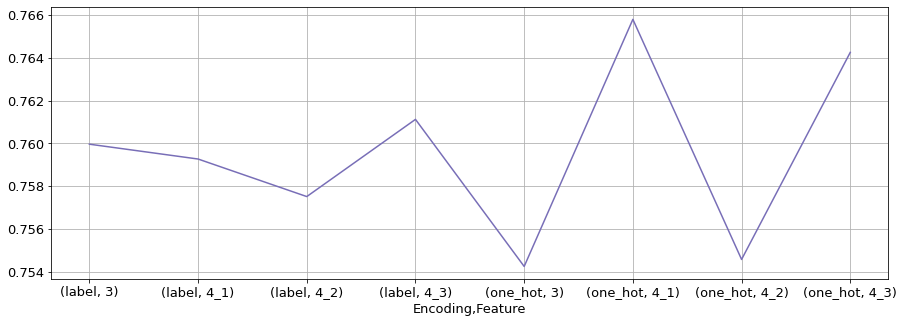

In [265]:
cross_res_smote.groupby(['Encoding','Feature']).mean()['Score'].plot(figsize=(15,5),color= color_dic[1][1],grid=True)
plt.show()

<br>

## ROC / AUC

- before resampling

- after resampling

-----------------------------
# 앞으로 남은 일

- EDA 추가
- 결과 해석(Cross_val)
- 결과 추가(ROC/AUC)
- 모델 최적화
- 최종 결과 해석